# Math 725

### Brent A. Thorne <brentathorne@gmail.com>

In class exercise detail.

## Ex 1.2 Midpoint Polygon Map

Suppose $V=(p_1,...,p_n)$, where $n$ is fixed.

$T:V\rightarrow V$

$(p_1,...,p_n) \xrightarrow{T} (\frac{p_1+p_2}{2},...,\frac{p_n+p_1}{2})$

In [114]:
# import libraries
import numpy as np
import sympy as sym
from sympy.matrices import Matrix
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from sympy import init_printing
init_printing() 

#### Note: Machine Epsilon

Half the distance between 1 and the next larger number. This can vary by computer. IEEE standards for double precision specify
$\epsilon_{machine}=2^{−53}≈1.11×10^{−16}$

We'll avoid any rounding issues by using symbolic algebra to do our calculations then approximate the numbers for plotting.

### ...and now for something completely different.

 + to animate we are going to push a vector to be plotted
 + each new vector will be used to normalize the stack
 + colour is maintained for the stack
 + stack is maintained to a set depth
 + do animation of normalization (rotation and scalling) 

Normalization is going to cause loss of precision.  We aren't going to be able to ingore this at some point


In [223]:
# fancy plot
def z_plot(Z, c=None):
    z= np.array(Z.tolist()).astype(np.complex64)
    n = len(z)
    plt.scatter(z.real, z.imag, c=c)
    for i in range(len(z)): # this got a bit fancy
        zz = z[i] + .06 *np.exp(1j*2*np.pi*i/n)  #offset text
        plt.text(zz.real, zz.imag, i, fontsize=12)
    z = np.append(z,z[0]) # close the shape
    plt.plot(z.real, z.imag, c=c)
    plt.grid(visible=True);
    plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', alpha = .2, linestyle='--')
    plt.axvline(0, color='black', alpha = .2, linestyle='--')
    
class polygon:  
    """
    imports point data and transform, then returns polygon object
    provides functions to transform, display and plot
    requires sympy Matrix     
    """
    def __init__(self, D, T):
        assert isinstance(D, Matrix) # eat matrix of points
        assert isinstance(T, Matrix) # eat transform matrix
        self.D = D
        self.T = T       
            
    def display(self, depth = 1): # so pretty
        display( Latex(f'$TD={sym.latex(self.T**(depth))}\
        {sym.latex(self.D)}$' + \
        f'$={sym.latex(Matrix(self.T**(depth)*self.D).n(2))}$ * rounded to two decimal points')) 
    
    def show(self):
        plt.show()
        
    def export(self, depth = 0, scale=1):
        '''manim wants a list of 3 elements lists'''
        Y =  self.T**depth * self.D
        zz = np.array(Y.tolist()).astype(np.complex64) 
        s = np.abs(zz.max())
        if scale != 1:
            zz = zz*scale
        zz = zz *3       # 3x for animation
        x= np.real(zz)
        y= np.imag(zz)
        z= np.zeros(zz.shape[0])        
        return (np.column_stack((x,y,z)).tolist()), s
        
    def plot(self, *argv):
        init = True
        for ii in range(*argv):
            c=None
            Z =  self.T**ii * self.D 
            z = np.array(Z.tolist()).astype(np.complex64)
            lim = np.abs(z.max())
            n = len(z)
            plt.scatter(z.real, z.imag, c=c)
            if False:  # suppress indexes for now
                for i in range(len(z)): # this got a bit fancy
                    zz = z[i] + .06 *np.exp(1j*2*np.pi*i/n)  #offset text
                    plt.text(zz.real, zz.imag, i, fontsize=12)
            z = np.append(z,z[0]) # close the shape
            plt.plot(z.real, z.imag, c=c)
            plt.grid(visible=True);
            plt.gca().set_aspect("equal") # square grids are pretty
            plt.axhline(0, color='black', alpha = .2, linestyle='--')
            plt.axvline(0, color='black', alpha = .2, linestyle='--')
            if init:
                plt.gca().set_ylim(-lim,lim)
                plt.gca().set_xlim(-lim,lim)
                init = False

In [224]:
def T(n):
    m = [sym.Rational(1,2)]  + [0 for i in range(n-2)] + [sym.Rational(1,2)] 
    return Matrix([m[-i:] + m[:-i] for i in range(n)]) 
#display(Latex(f'$T\in C^3={sym.latex(T(3))}$, also $T^{-1}\in C^3={sym.latex(T(3).inv())}$'))

### Permutation Matrix

<IPython.core.display.Latex object>

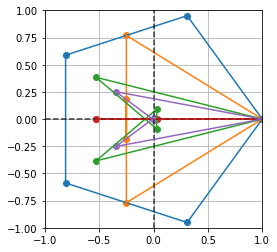

In [309]:
n=5
zeta = sym.exp(-2 * sym.I * sym.pi/n)
poly = Matrix([zeta**i for i in range(n)])
M = sym.diag([(1+zeta**i)/2 for i in range(n)], unpack=True)

p = polygon(poly,M)
p.plot(5)
p.display()

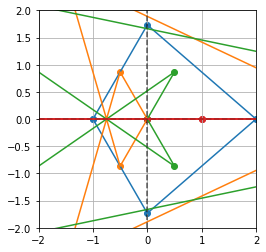

In [290]:
p = polygon(poly,M)
p.plot(1,5)

<IPython.core.display.Latex object>

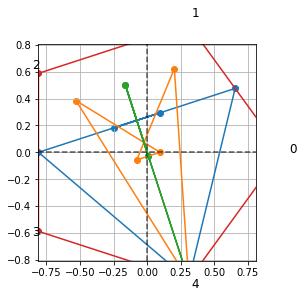

In [317]:
n=5
zeta = sym.exp(2*sym.I*sym.pi/n)
poly = Matrix([zeta**i for i in range(n)])
#poly = sym.ones(n,1)
M = sym.diag([(1+zeta**i)/2 for i in range(1,n+1)], unpack=True)
#M = (1+zeta)/2 * sym.eye(n)
q = polygon(poly, M)
q.display()
q.plot(1,4)
z_plot(q.D)